# 04-using-3-data-sets

In [1]:
import networkx as nx
from networkx.algorithms.link_prediction import jaccard_coefficient

import numpy as np
import matplotlib
import matplotlib.pylab as plt
import pickle
%matplotlib inline

from sklearn.model_selection import train_test_split

from concurrent.futures import ProcessPoolExecutor

import copy

#### Import functions from other code files

In [2]:
import nbimporter
import importlib

# Import nbs
import _01_data_generation  # Import the notebook as a module
import _02_predictor_data_normalization  # Import the notebook as a module
import _02point5_data_sanity_checks  # Import the notebook as a module
import _03_model_training  # Import the notebook as a module

# Refresh nbs for new changes
importlib.reload(_01_data_generation)
importlib.reload(_02_predictor_data_normalization)
importlib.reload(_02point5_data_sanity_checks)
importlib.reload(_03_model_training)



<module '_03_model_training' from '_03_model_training.ipynb'>

#### Create folders to store data inside of, if running sub ipynb files independently

In [ ]:
import os

# List of folder names
folders = [
    "01-network-data",
    "02-predictor-data",
    "03-normalized-data",
    "04-edgenonedge-data",
    "05-edge-metadata",
    "saved-figures"
]

# Create each folder if it doesn't already exist
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"Ensured folder exists: {folder}")

## Import Data

In [3]:
Gs_subDomains = _01_data_generation.import_data()


## ROC Curve for each data type

In [4]:
def create_data(Gs, alpha):
    
    Gs_o, Gs_missing = _01_data_generation.seperate_Go_Gmissing(Gs, alpha) # Make G-Observed and G-Missing

    # Create data 
    edgenonedge_data = _01_data_generation.create_edgenonedge_data_ALL(Gs_o, Gs_missing)
    predictors = _01_data_generation.run_predictors(Gs_o)
    edge_metadata = _01_data_generation.create_edge_metadata_ALL(Gs_o, predictors)

    return edgenonedge_data, predictors, edge_metadata


In [5]:
def normalize_predictors(predictors):
    predictors = _02_predictor_data_normalization.add_noise(predictors) # Add noise
    predictors = _02_predictor_data_normalization.normalize_predictors(predictors) # Normalize
    return predictors
    

In [ ]:
def train_models(edgenonedge_data, full_edge_metadata, predictors, edge_metadata, global_random_state):

    # Get most common estimators
    mces, edges_kept = _03_model_training.compute_mces_with_sampling(edgenonedge_data, predictors, non_edge_sample_prob=1)

    # Create train/test data
    X_train, y_train, X_test, y_test =  _03_model_training.custom_train_test_split(edge_metadata, mces, test_size=0.2, random_state=global_random_state)
    
    # Create training data
    non_edge_sample_prob = 0.001 
    X_train_reduced, y_train_reduced = _03_model_training.create_training_data(edgenonedge_data, predictors, non_edge_sample_prob, full_edge_metadata, test_size=0.2, random_state=global_random_state)
    
    # Train models
    nb, svm, rf = _03_model_training.train_models(X_train_reduced, y_train_reduced)

    return nb, svm, rf, X_test, y_test



Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


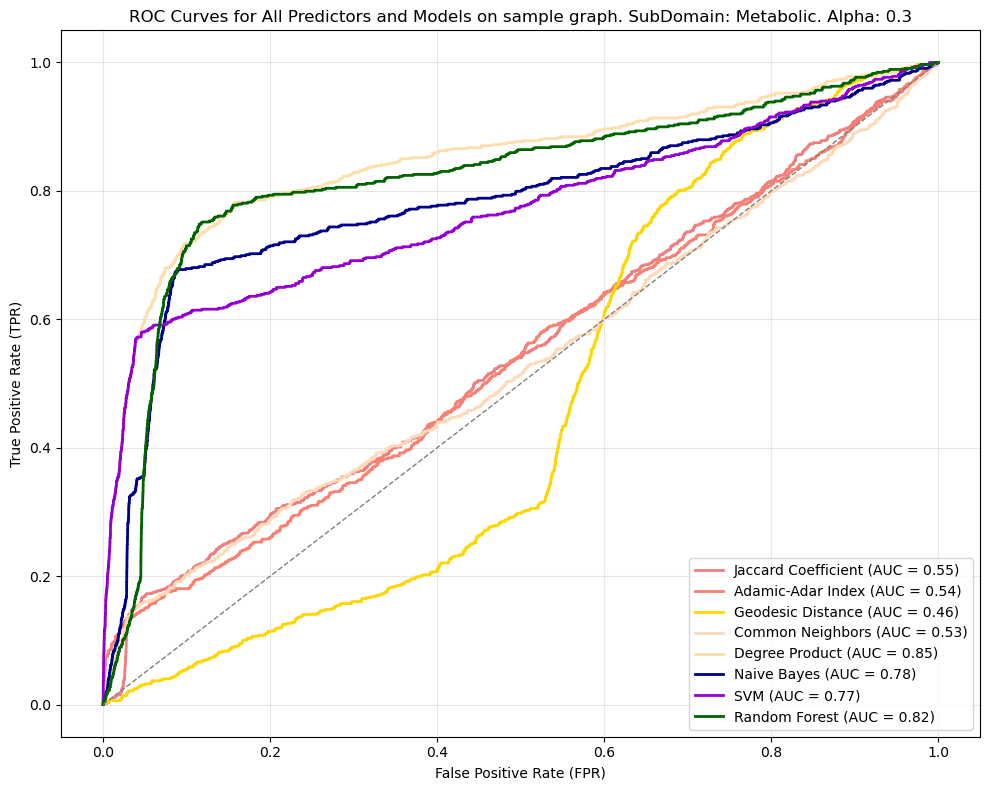

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


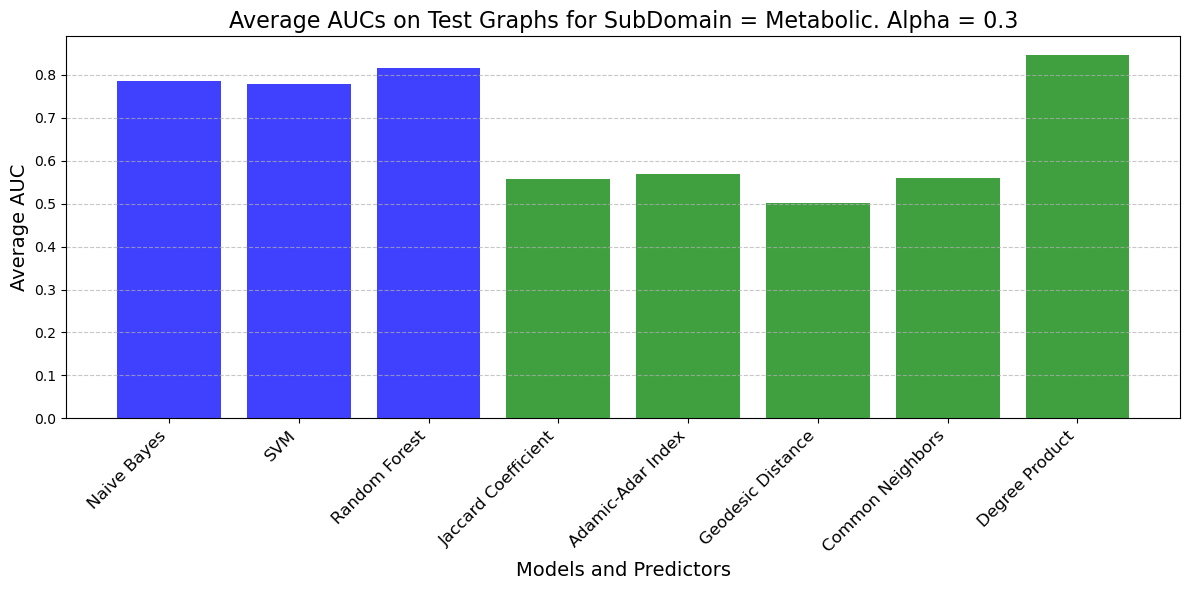

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


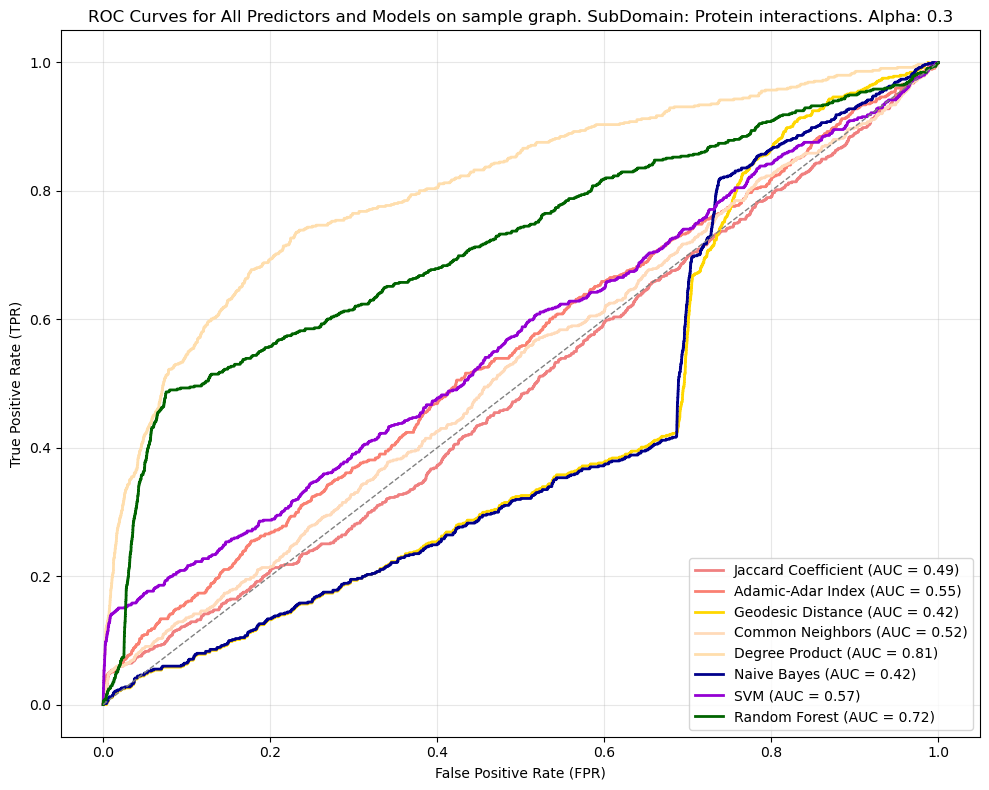

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


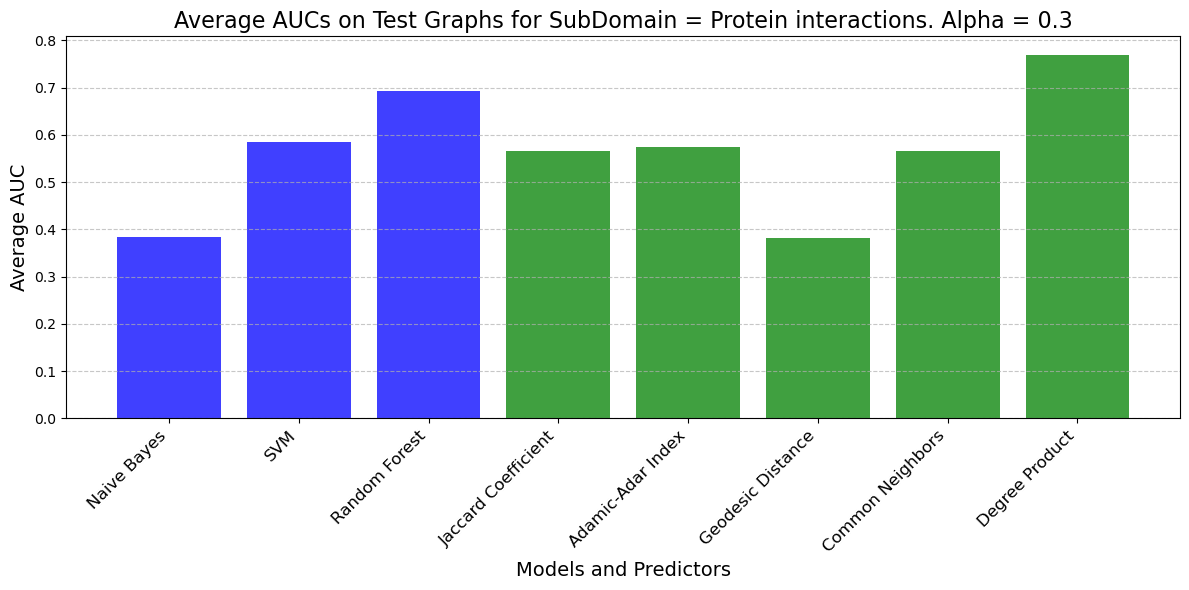

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


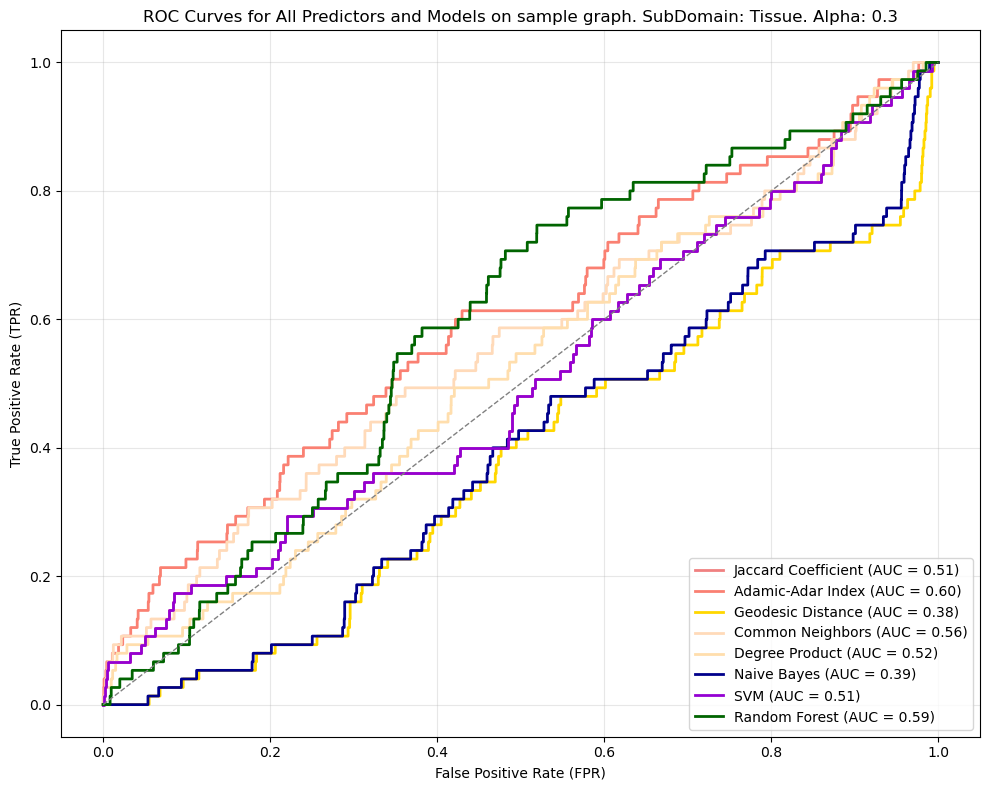

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


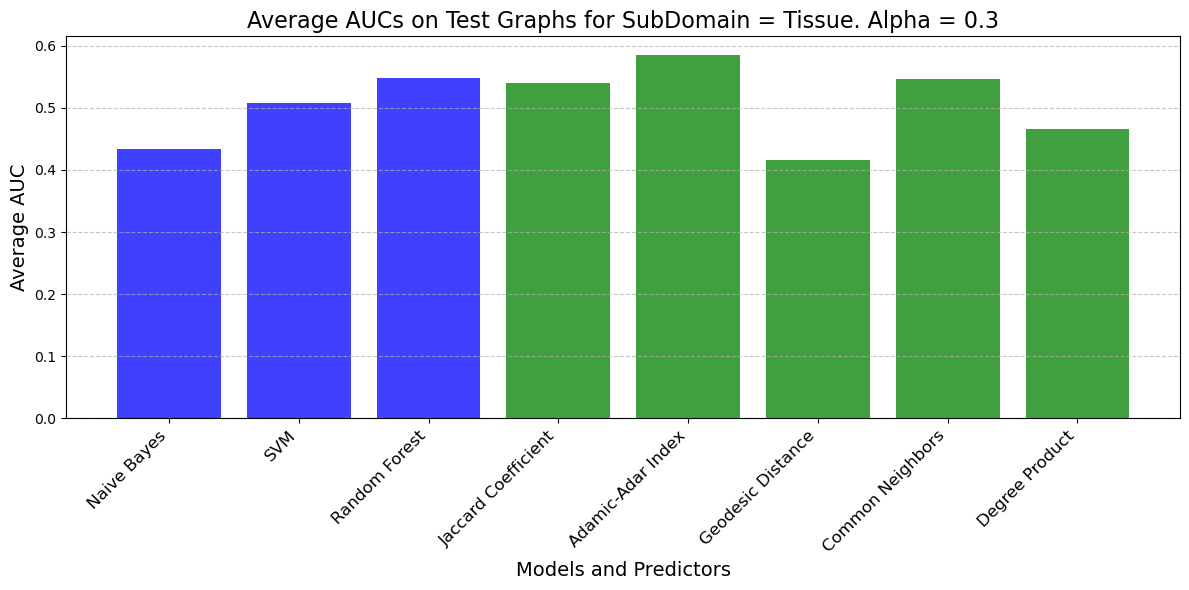

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


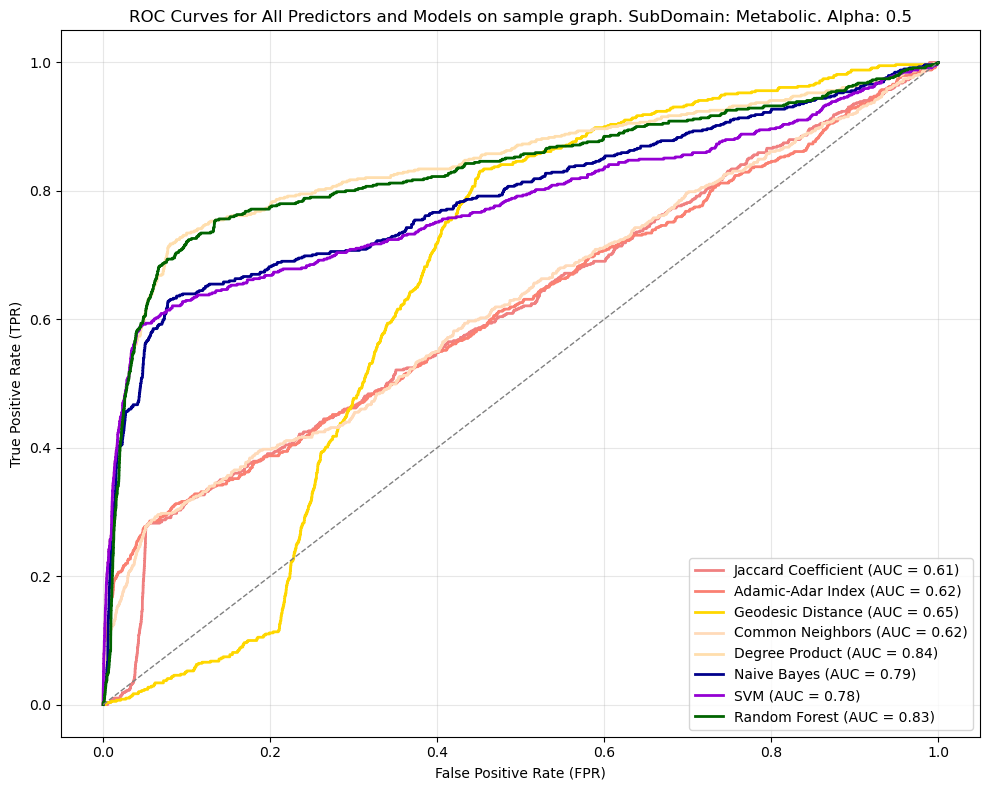

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


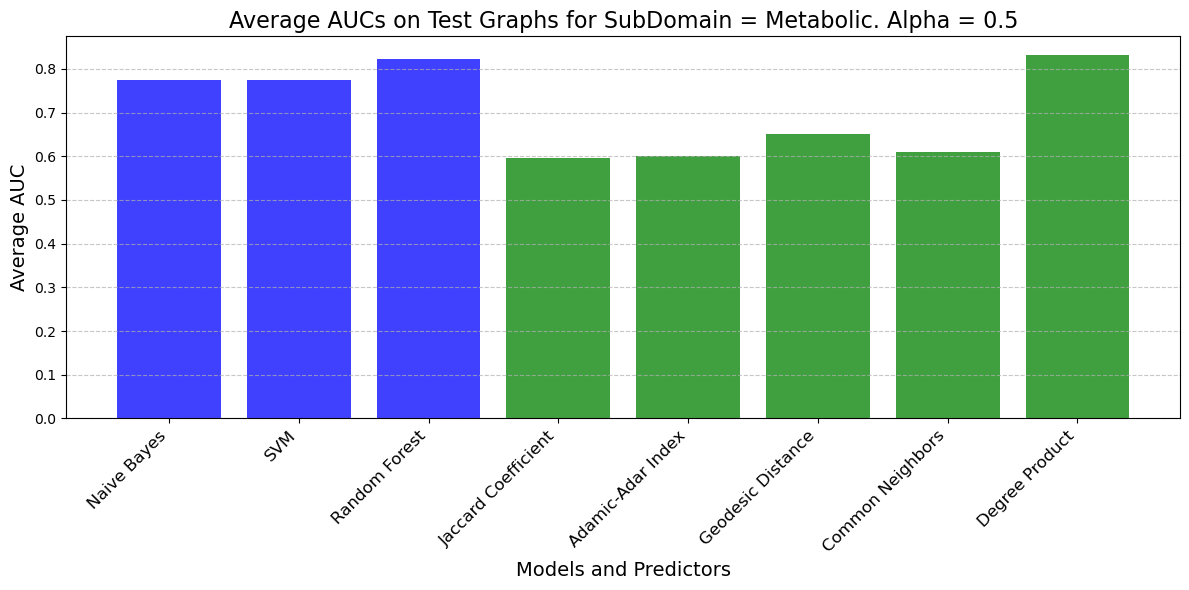

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


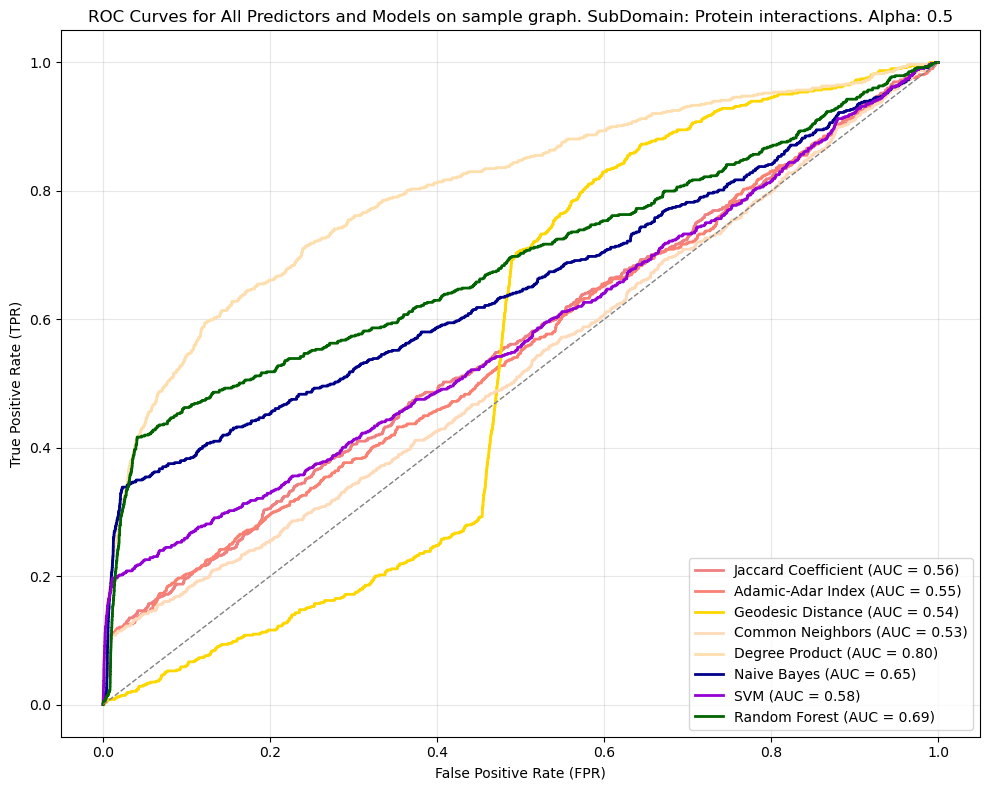

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


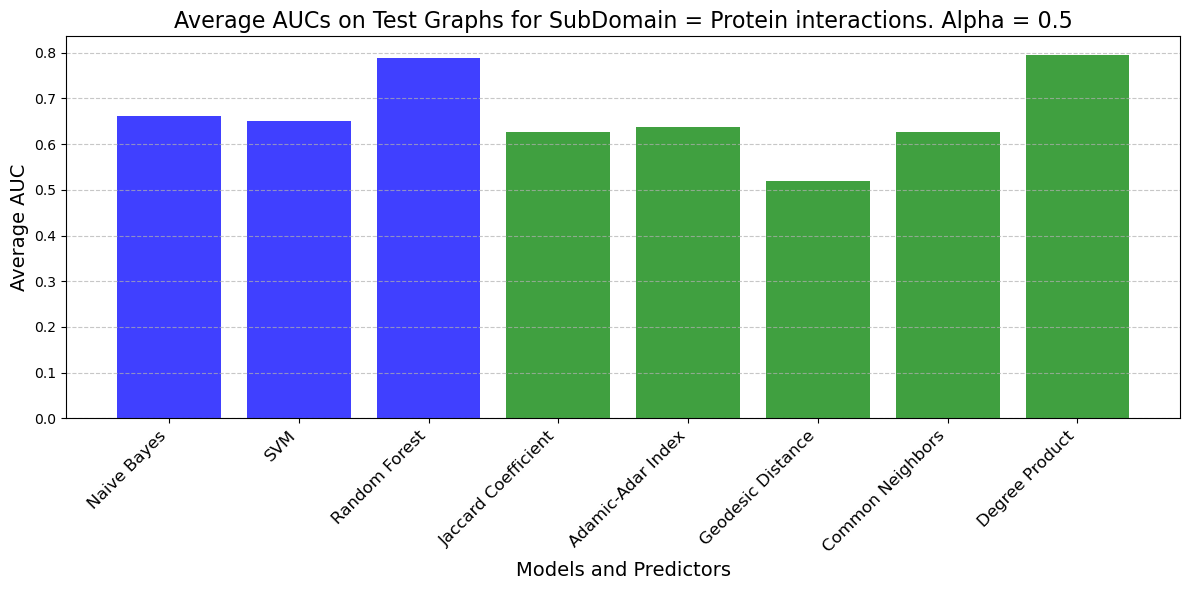

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


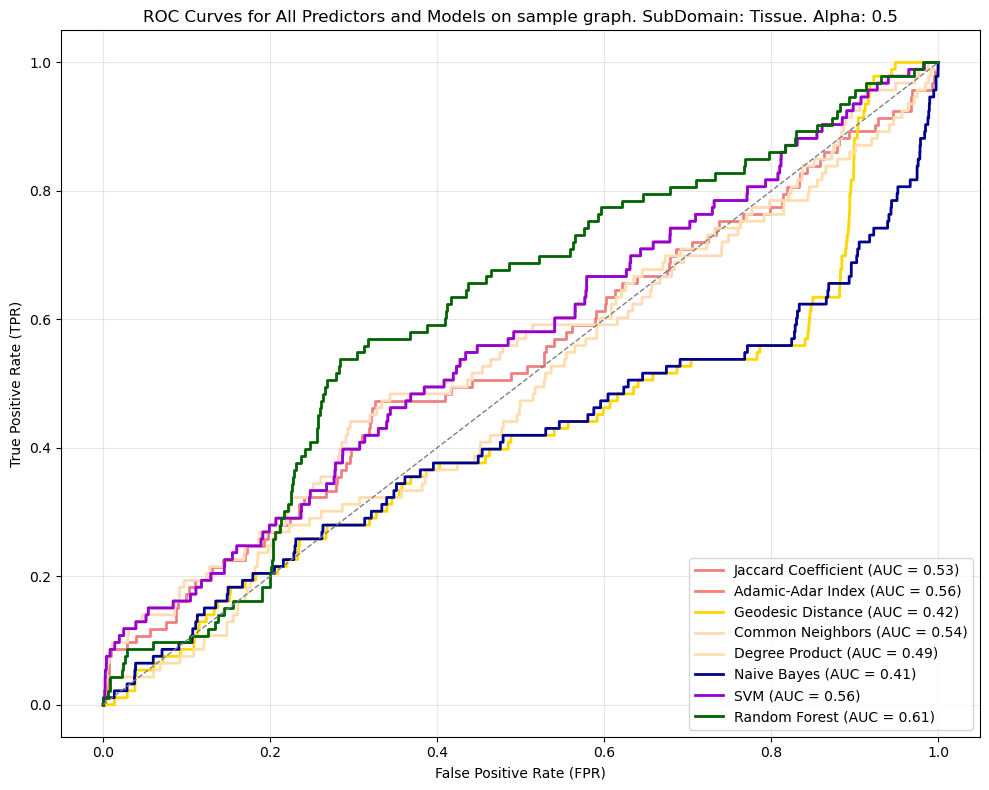

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


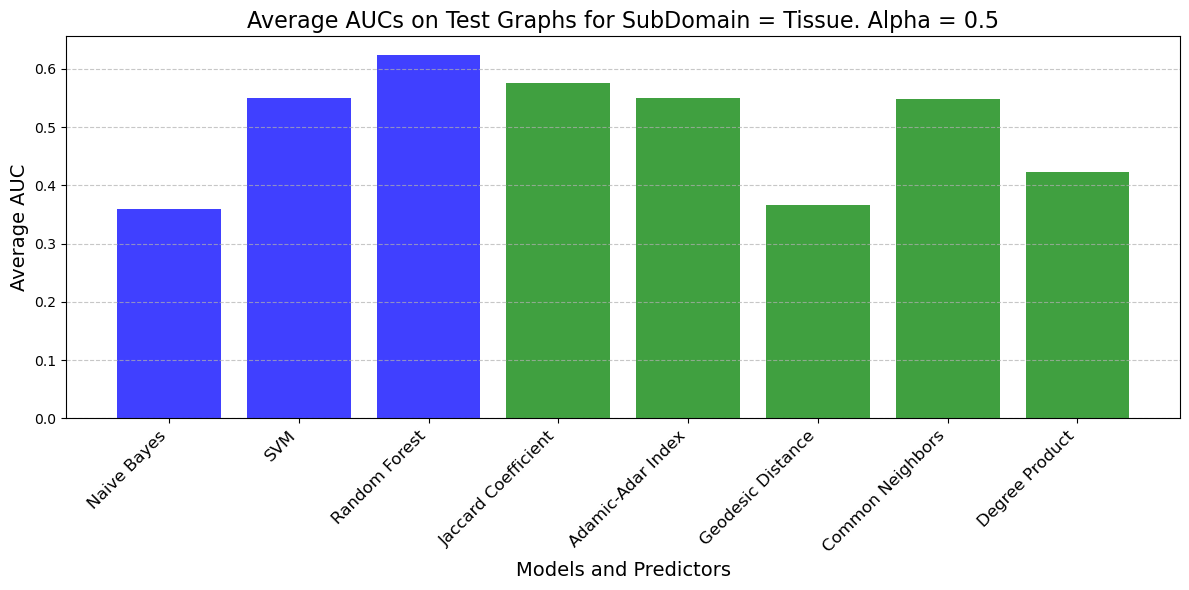

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


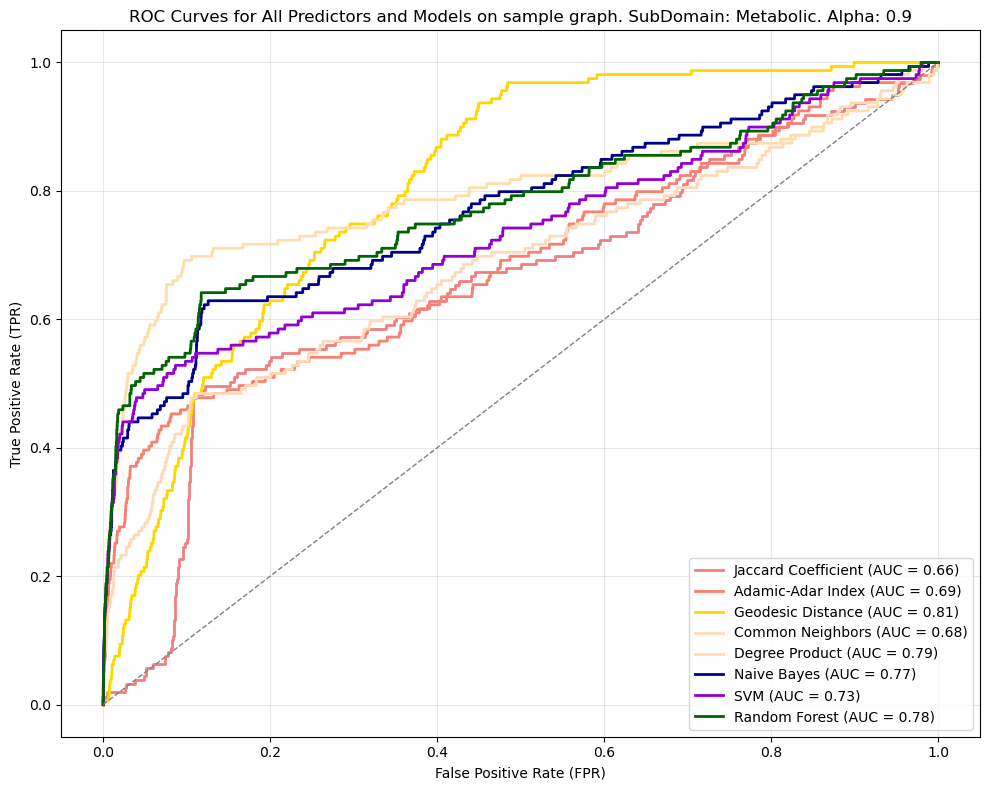

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


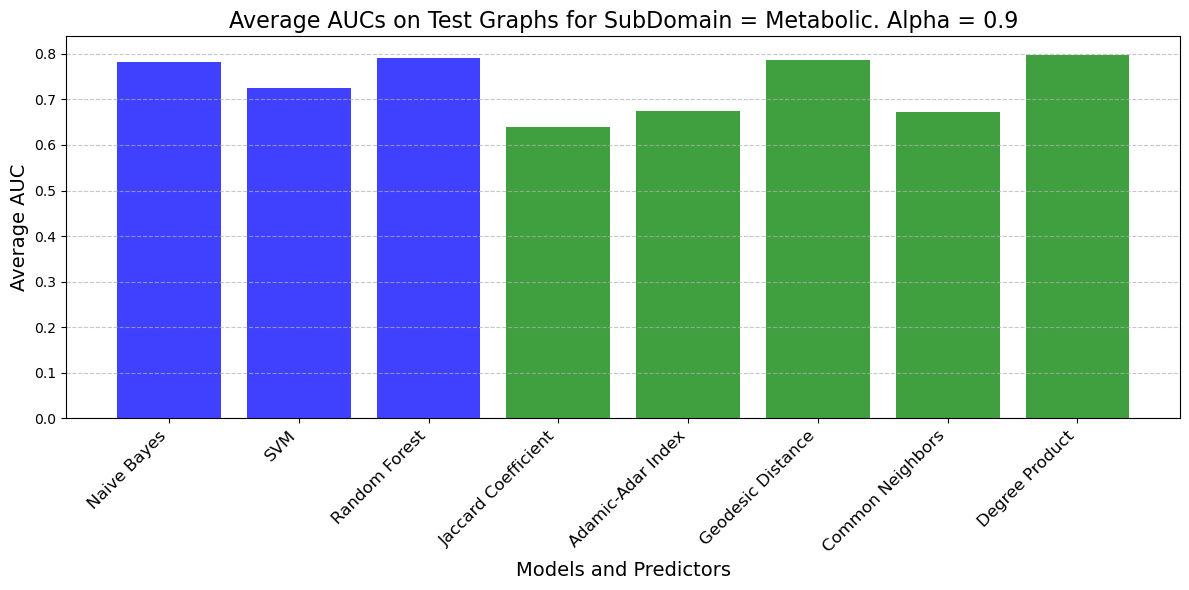

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


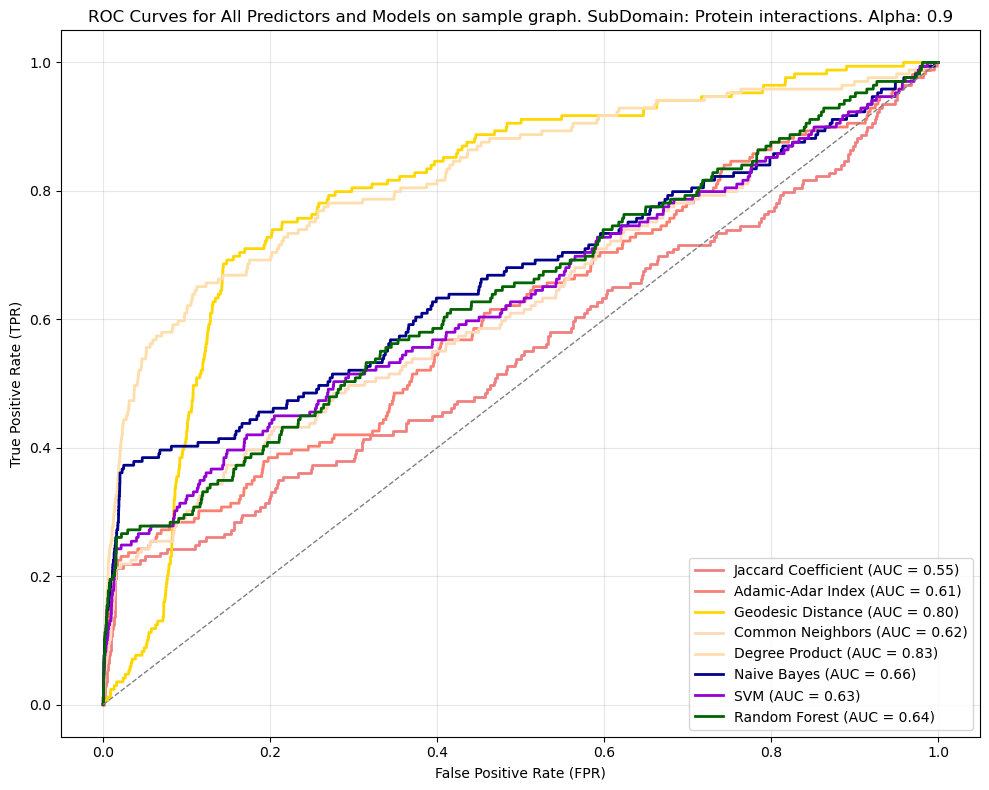

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


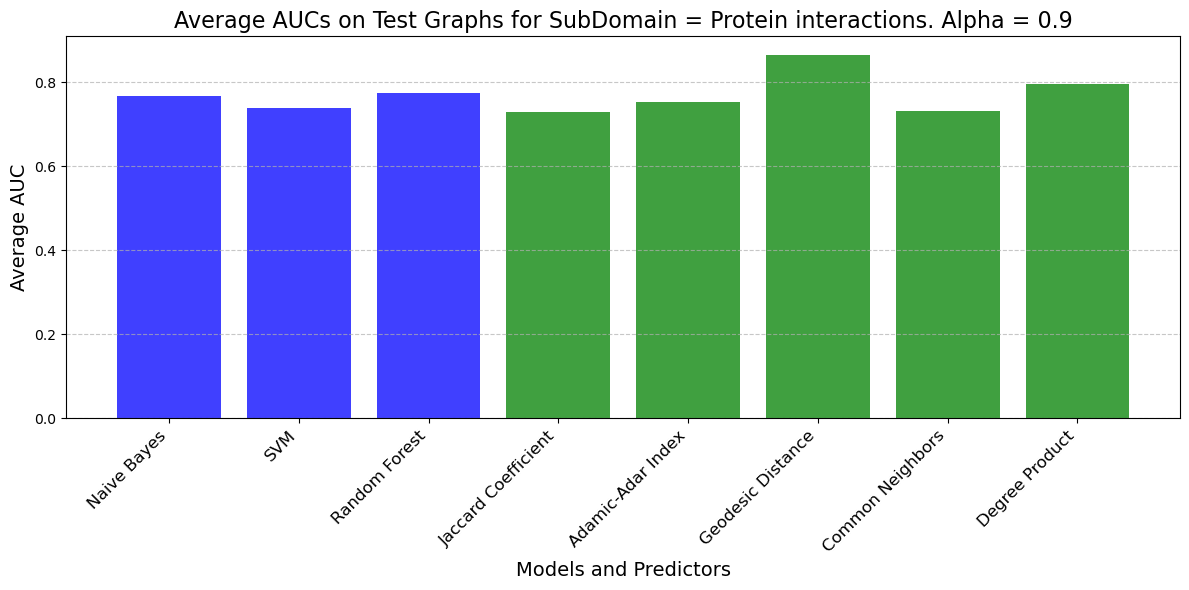

Naive Bayes training complete.
SVM training complete.
Random Forest training complete.


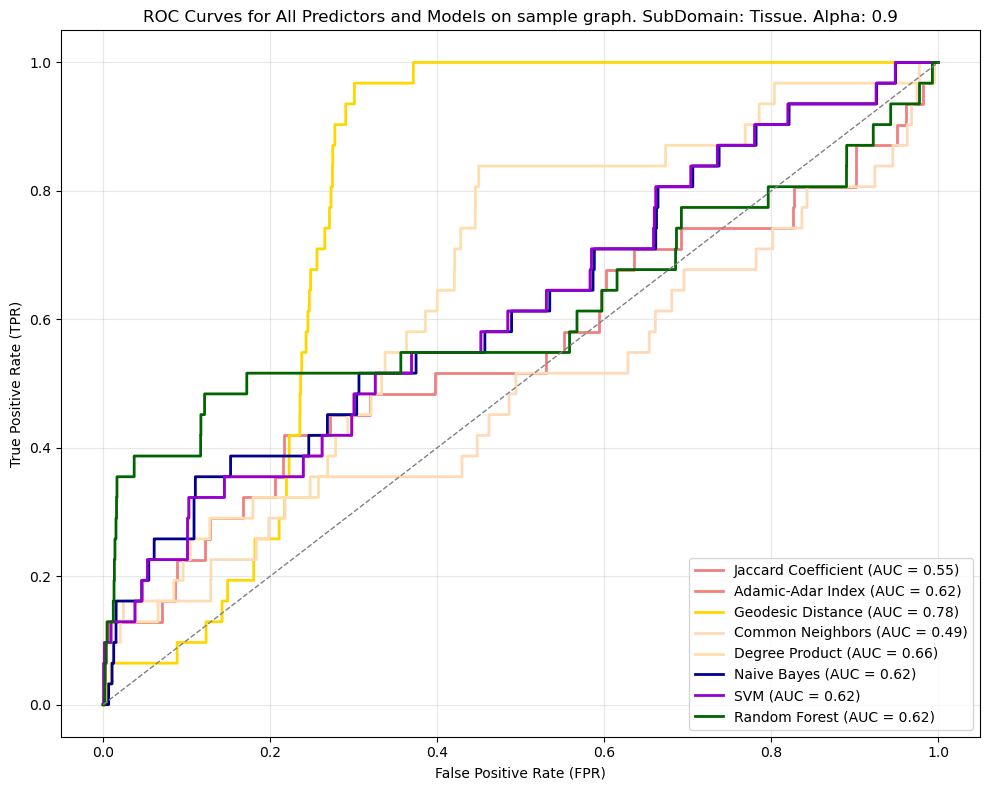

/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/owenkutzscher/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


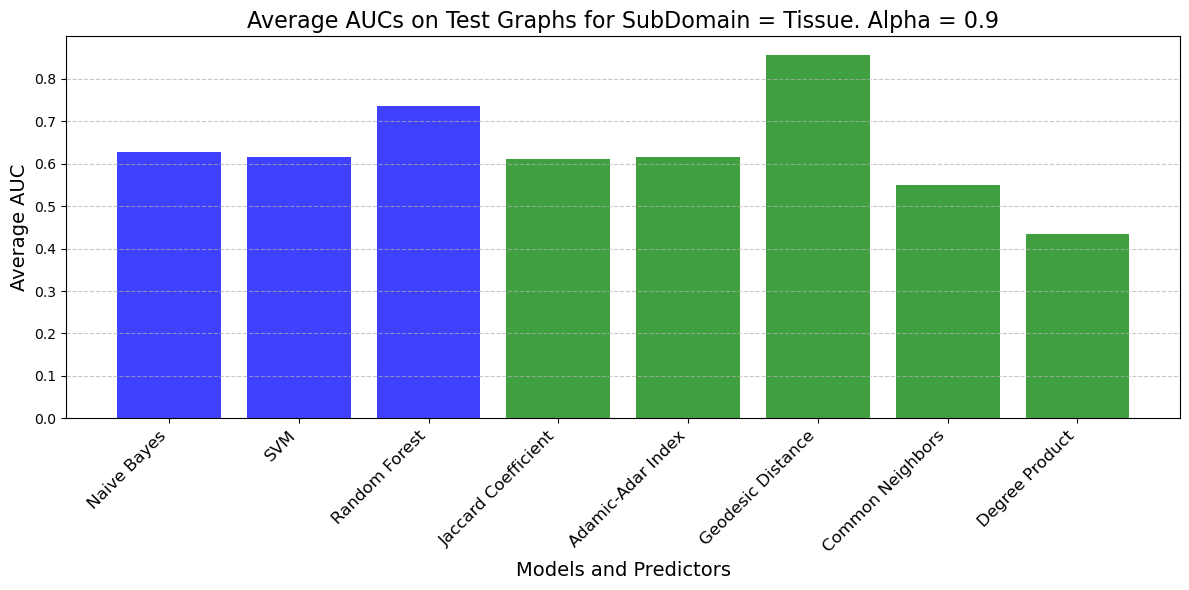

In [7]:
# Create and train ML models

alphas = [0.3, 0.5, 0.9]
global_random_state = 26
subDomains = ['Metabolic', 'Protein interactions', 'Tissue']


for alpha in alphas:
    for Gs, subDomain in zip(Gs_subDomains, subDomains): # One each of the 3 subdomains
        # Gs = Gs_subDomains[0]
        
        # Create data
        edgenonedge_data, predictors, edge_metadata = create_data(Gs, alpha)

        # Normalize predictors
        predictors = normalize_predictors(predictors) 
        predictors = predictors[:5] # Remove baseline predictor

        # Run models
        nb, svm, rf, X_test, y_test = train_models(edgenonedge_data, edge_metadata, predictors, edge_metadata, global_random_state)

        # Display ROC curve
        _03_model_training.display_ROC(nb, svm, rf, edge_metadata, global_random_state, X_test, y_test, edgenonedge_data, predictors, subDomain, alpha)
        
        # Calculate average AUCs
        average_AUCs = _03_model_training.compute_average_AUC(
            nb, svm, rf, 
            edge_metadata, global_random_state, 
            X_test, y_test, 
            edgenonedge_data, 
            predictors
        )
        # Display data in bar plot
        _03_model_training.plot_average_AUCs(average_AUCs, subDomain, alpha)


